<a href="https://colab.research.google.com/github/Cotton-web/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the required libraries for analysis.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Loading the dataset into a datframe

In [88]:
df = pd.read_csv("data.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30.0,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9.0,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19.0,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6.0,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136.0,yes,yes,cellular,3.0,apr,345,2,249,7,other,no


##Getting information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4519 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4517 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4516 non-null   float64
 6   housing    4520 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4519 non-null   object 
 9   day        4520 non-null   float64
 10  month      4520 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4517 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB


In [7]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
contact,object
day,float64


###Dropping irrelevant columns.

In [89]:
df.drop(['pdays','previous','poutcome','y'], axis=1, inplace=True)
print('Done!')

Done!


In [91]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
contact,object
day,float64


###Checking for duplicates.

In [92]:
duplicate_rows= df[df.duplicated()]
print('Number of duplicate rows: ', duplicate_rows.shape)

Number of duplicate rows:  (0, 13)


###Checking for null values.

In [93]:
print(df.isnull().sum())
df = df.dropna()

age          0
job          2
marital      0
education    4
default      0
balance      5
housing      1
loan         0
contact      2
day          1
month        1
duration     0
campaign     0
dtype: int64


In [94]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
dtype: int64


##Detecting outliers.

<Axes: xlabel='age'>

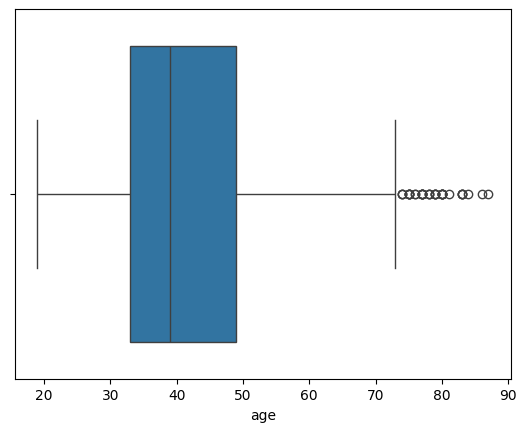

In [34]:
sns.boxplot(x=df['age'])

<Axes: xlabel='balance'>

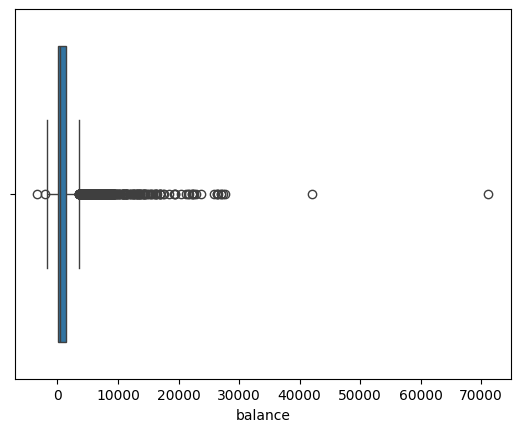

In [36]:
sns.boxplot(x=df['balance'])

<Axes: xlabel='education', ylabel='balance'>

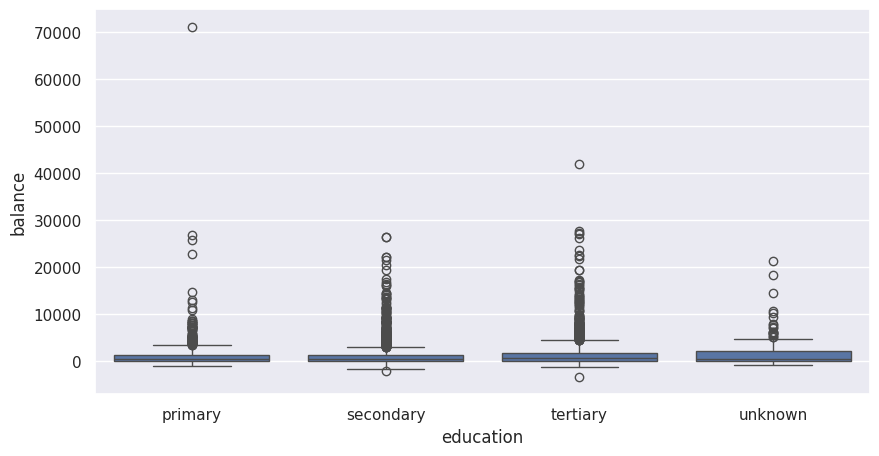

In [53]:
sns.boxplot(x=df['education'],y=df['balance'])

##Plot different features against one another.

Text(0, 0.5, 'Number of accounts')

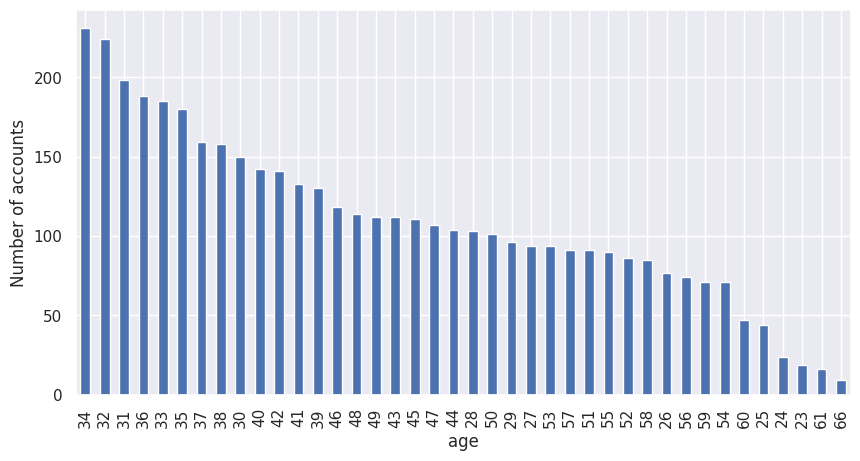

In [66]:
df.age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of accounts')

<Axes: xlabel='loan', ylabel='housing'>

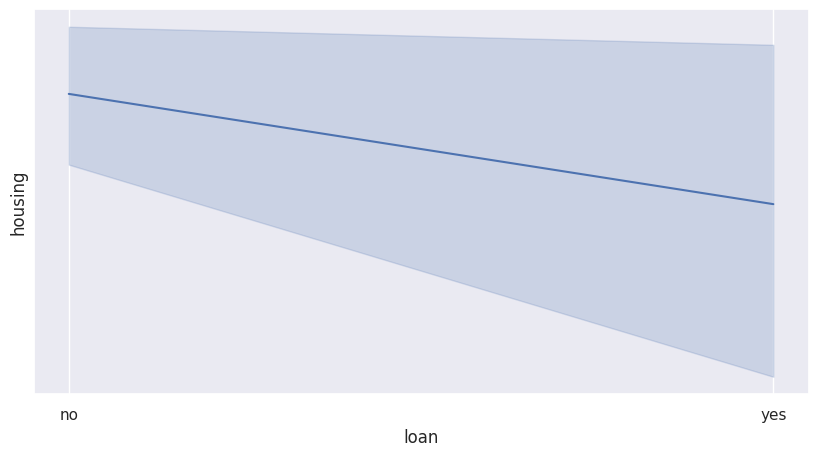

In [61]:
sns.lineplot(x=df['loan'], y=df['housing'])

<Axes: ylabel='balance'>

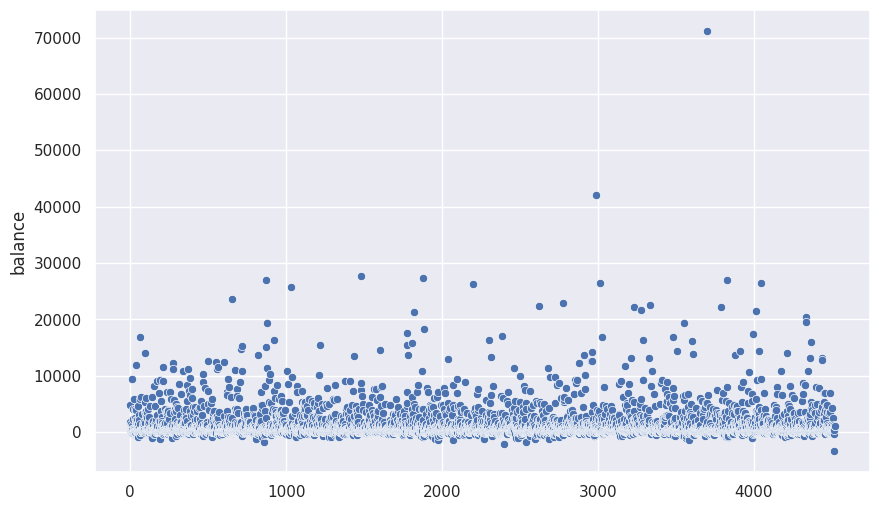

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['balance'])

<Axes: >

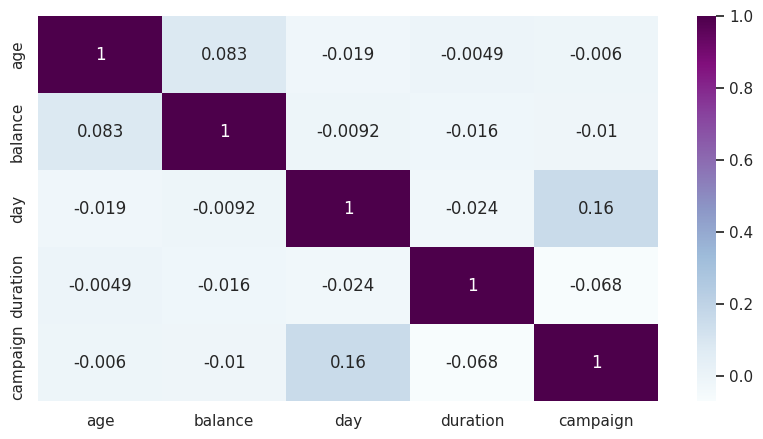

In [97]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,annot=True,cmap='BuPu')